In [1]:
import pandas as pd
import numpy
import json
import os
import csv
import codecs
import datetime as dt
from matplotlib import pyplot as plt



In [2]:
### json template of instagram messages
# """
# "participants": [
#     {
#       "name": "______amjad"
#     },
#     {
#       "name": "Salwa Design | \u00d8\u00b3\u00d9\u0084\u00d9\u0088\u00d9\u008a \u00d8\u00af\u00db\u008c\u00d8\u00b2\u00d8\u00a7\u00db\u008c\u00d9\u0086"
#     }
#   ],
#   "messages": [

#     {
#       "sender_name": "Salwa Design | \u00d8\u00b3\u00d9\u0084\u00d9\u0088\u00d9\u008a \u00d8\u00af\u00db\u008c\u00d8\u00b2\u00d8\u00a7\u00db\u008c\u00d9\u0086",
#       "timestamp_ms": 1705392963364,
#       "content": "\u00f0\u009f\u008e\u0081\u00e2\u0099\u00a5\u00ef\u00b8\u008f \u00d9\u0084\u00d8\u00a7 \u00d8\u00aa\u00d9\u0081\u00d9\u0088\u00d8\u00aa\u00d9\u0083\u00d9\u0085 \u00d8\u00b9\u00d8\u00b1\u00d9\u0088\u00d8\u00b6\u00d8\u00a7\u00d8\u00aa \u00d8\u00b3\u00d9\u0084\u00d9\u0088\u00d9\u008a \u00d8\u00af\u00d9\u008a\u00d8\u00b2\u00d8\u00a7\u00d9\u008a\u00d9\u0086 \u00d8\u00a8\u00d9\u0085\u00d9\u0086\u00d8\u00a7\u00d8\u00b3\u00d8\u00a8\u00d8\u00a9 Valentine's \u00e2\u0099\u00a5\u00ef\u00b8\u008f\u00f0\u009f\u008e\u0081\n\n\n\u00d8\u00a7\u00d9\u0087\u00d9\u0084\u00d8\u00a7 \u00d8\u00a8\u00d9\u0083 \u00f0\u009f\u0092\u009b\n\n\u00d8\u00a7\u00d9\u0086\u00d9\u0087\u00d8\u00a7 \u00d9\u0084\u00d9\u0088\u00d8\u00ad\u00d8\u00a7\u00d8\u00aa \u00d9\u0085\u00d9\u0086\u00d8\u00b3\u00d9\u0088\u00d8\u00ac\u00d8\u00a9 \u00d9\u008a\u00d8\u00af\u00d9\u0088\u00d9\u008a\u00d8\u00a7 \u00d9\u0085\u00d8\u00b9 \u00d8\u00aa\u00d9\u0081\u00d8\u00a7\u00d8\u00b5\u00d9\u008a\u00d9\u0084 \u00d8\u00a3\u00d9\u0086\u00d9\u008a\u00d9\u0082\u00d8\u00a9 \u00d8\u00b5\u00d8\u00a7\u00d8\u00ba\u00d9\u0087\u00d8\u00a7 \u00d9\u0081\u00d9\u0086\u00d8\u00a7\u00d9\u0086\u00d9\u0088\u00d9\u0086 \u00d9\u0085\u00d8\u00ad\u00d8\u00aa\u00d8\u00b1\u00d9\u0081\u00d9\u0088\u00d9\u0086 \u00d8\u008c \u00d9\u0085\u00d9\u0085\u00d8\u00a7 \u00d9\u008a\u00d8\u00ac\u00d8\u00b9\u00d9\u0084 \u00d8\u00a7\u00d9\u0084\u00d8\u00a7\u00d9\u0086\u00d8\u00b3\u00d8\u00ac\u00d8\u00a7\u00d9\u0085 \u00d8\u00a7\u00d9\u0084\u00d8\u00b1\u00d8\u00a7\u00d8\u00a6\u00d8\u00b9 \u00d9\u0084\u00d8\u00af\u00d9\u008a\u00d9\u0083\u00d9\u0088\u00d8\u00b1 \u00d8\u00a7\u00d9\u0084\u00d9\u0085\u00d9\u0086\u00d8\u00b2\u00d9\u0084 \u00d9\u0088\u00d8\u00a7\u00d9\u0084\u00d9\u0085\u00d9\u0083\u00d8\u00aa\u00d8\u00a8. \u00f0\u009f\u00a7\u00b5\n\u00d9\u0087\u00d8\u00af\u00d9\u008a\u00d8\u00a9 \u00d8\u00a5\u00d8\u00a8\u00d8\u00af\u00d8\u00a7\u00d8\u00b9\u00d9\u008a\u00d8\u00a9 \u00d9\u0085\u00d9\u0085\u00d9\u008a\u00d8\u00b2\u00d8\u00a9 \u00d8\u00ac\u00d8\u00af\u00d8\u00a7\u00d9\u008b \n\u00d9\u0086\u00d8\u00b8\u00d8\u00b1\u00d9\u008b\u00d8\u00a7 \u00d9\u0084\u00d8\u00a3\u00d9\u0086\u00d9\u0087\u00d8\u00a7 \u00d9\u0087\u00d8\u00af\u00d9\u008a\u00d8\u00a9 \u00d8\u00b1\u00d8\u00a7\u00d8\u00a6\u00d8\u00b9\u00d8\u00a9 \u00d8\u008c \u00d9\u0085\u00d8\u00a7 \u00d8\u00b9\u00d9\u0084\u00d9\u008a\u00d9\u0083 \u00d8\u00b3\u00d9\u0088\u00d9\u0089 \u00d8\u00a5\u00d8\u00b1\u00d8\u00b3\u00d8\u00a7\u00d9\u0084 \u00d8\u00b5\u00d9\u0088\u00d8\u00b1\u00d8\u00a9 \u00d9\u0085\u00d9\u0081\u00d8\u00b6\u00d9\u0084\u00d8\u00a9 \u00d9\u0084\u00d9\u0088\u00d8\u00ac\u00d9\u0087\u00d9\u0083 \u00d8\u008c \u00d8\u00ab\u00d9\u0085 \u00d8\u00b3\u00d9\u008a\u00d8\u00aa\u00d9\u0085 \u00d9\u0086\u00d8\u00b3\u00d8\u00ac\u00d9\u0087\u00d8\u00a7 \u00d9\u008a\u00d8\u00af\u00d9\u0088\u00d9\u008a\u00d9\u008b\u00d8\u00a7 \u00d8\u00a8\u00d8\u00ae\u00d9\u008a\u00d8\u00b7 \u00d9\u0088\u00d8\u00a7\u00d8\u00ad\u00d8\u00af \u00d8\u00a8\u00d8\u00b7\u00d9\u0088\u00d9\u0084 5 \u00d9\u0083\u00d9\u008a\u00d9\u0084\u00d9\u0088\u00d9\u0085\u00d8\u00aa\u00d8\u00b1\u00d8\u00a7\u00d8\u00aa.\n\u00f0\u009f\u009f\u00a1\u00d9\u0085\u00d8\u00b9 \u00d8\u00b4\u00d8\u00ad\u00d9\u0086 \u00d9\u0085\u00d8\u00ac\u00d8\u00a7\u00d9\u0086\u00d9\u008a \u00e2\u009c\u0088\u00ef\u00b8\u008f\u00f0\u009f\u0086\u0093\n\n\u00d9\u008a\u00d9\u0085\u00d9\u0083\u00d9\u0086\u00d9\u0083 \u00d8\u00a7\u00d9\u0084\u00d8\u00ad\u00d8\u00b5\u00d9\u0088\u00d9\u0084 \u00d8\u00b9\u00d9\u0084\u00d9\u0089 \u00d9\u0085\u00d9\u0082\u00d8\u00b7\u00d8\u00b9 \u00d9\u0081\u00d9\u008a\u00d8\u00af\u00d9\u008a\u00d9\u0088 \u00d9\u0084\u00d9\u0081\u00d8\u00aa\u00d8\u00b1\u00d8\u00a7\u00d8\u00aa \u00d8\u00b2\u00d9\u0085\u00d9\u0086\u00d9\u008a\u00d8\u00a9 \u00d9\u0084\u00d8\u00b5\u00d9\u0086\u00d8\u00b9 \u00d9\u0081\u00d9\u0086 \u00d8\u00a7\u00d9\u0084\u00d8\u00b3\u00d9\u0084\u00d8\u00b3\u00d9\u0084\u00d8\u00a9 \n\u00d8\u00a7\u00d9\u0084\u00d8\u00ae\u00d8\u00a7\u00d8\u00b5 \u00d8\u00a8\u00d9\u0083\u00f0\u009f\u0098\u008d\u00f0\u009f\u008e\u00a5\n\u00d9\u0085\u00d9\u0086 \u00d8\u00ae\u00d9\u0084\u00d8\u00a7\u00d9\u0084 \u00d8\u00a7\u00d8\u00ae\u00d8\u00aa\u00d9\u008a\u00d8\u00a7\u00d8\u00b1 Tabby\u00d8\u00b9\u00d9\u0086\u00d8\u00af \u00d8\u00a7\u00d9\u0084\u00d8\u00af\u00d9\u0081\u00d8\u00b9\u00d8\u008c \u00db\u008c\u00d9\u0085\u00da\u00a9\u00d9\u0086\u00d9\u0083 \u00d8\u00a3\u00d9\u0086 \u00d8\u00aa\u00d8\u00aa\u00d8\u00b3\u00d9\u0088\u00d9\u0082 \u00d8\u00a7\u00d9\u0084\u00d8\u00a2\u00d9\u0086 \u00d9\u0088 \u00d8\u00aa\u00d8\u00af\u00d9\u0081\u00d8\u00b9 \u00d9\u0084\u00d8\u00a7\u00d8\u00ad\u00d9\u0082\u00d9\u008b\u00d8\u00a7 \u00d8\u00b9\u00d9\u0084\u00d9\u0089 4 \u00d8\u00a3\u00d9\u0082\u00d8\u00b3\u00d8\u00a7\u00d8\u00b7 \u00d8\u00a8\u00d8\u00af\u00d9\u0088\u00d9\u0086 \u00d9\u0081\u00d9\u0088\u00d8\u00a7\u00d8\u00a6\u00d8\u00af \u00d8\u00b9\u00d9\u0086\u00d8\u00af \u00d8\u00a7\u00d9\u0084\u00d8\u00af\u00d9\u0081\u00d8\u00b9 \u00f0\u009f\u0098\u008d*",
#       "is_geoblocked_for_viewer": false
#     },
#     {
#       "sender_name": "Salwa Design | \u00d8\u00b3\u00d9\u0084\u00d9\u0088\u00d9\u008a \u00d8\u00af\u00db\u008c\u00d8\u00b2\u00d8\u00a7\u00db\u008c\u00d9\u0086",
#       "timestamp_ms": 1705392085004,
#       "content": "______amjad replied to an Ad. See post(https://www.instagram.com/p/C1KtYG-tnqO/)",
#       "is_geoblocked_for_viewer": false
#     },
#   ],
#   "title": "______amjad",
#   "is_still_participant": true,
#   "thread_path": "inbox/______amjad_1312630076798892",
#   "magic_words": [

#   ]
# }
# """

In [18]:
INBOX_DIRECTORY_ADDRESS = "your_instagram_activity/messages/inbox"
listOfCountries = ["العراق", "الكويت", "الأردن", "السعودية", "الإمارات العربية المتحدة", 
                   "البحرين", "الأردن", "اللبنان", "مصر", "السودان", "الجزائر", "موريتانيا",
                     "العمان", "القطر", "اليمن","الامارات","عراق", "كويت", "أردن", "سعودية",
                       "إمارات العربية المتحدة", "بحرين", "أردن", "لبنان", "مصر", "سودان", 
                       "جزائر", "موريتانيا", "عمان", "قطر", "يمن"]

chatDataFrame = pd.DataFrame(
    columns=[
        "Customer ID",
        "Number of Salwa Messages",
        "Salwa Messages",
        "Number of Customer Messages",
        "Customer Messages",
        "Did We audio call?",
        "country",
        "timestamp of first message",
        "timestamp of last message",
        "firstResponseTime",
        "inboxFolderPath",
        "messageChain",
        "messageDateTime",
        "messageTimeDiffrense",
        "messageSenderName",
    ]
)

listOfFolders = os.listdir(INBOX_DIRECTORY_ADDRESS)
for i in listOfFolders:
    with open(f"{INBOX_DIRECTORY_ADDRESS}/{i}/message_1.json") as f:
        ###defining variables and dummies 
        data = json.load(f)
        customerId = data["participants"][0]["name"].encode("latin1").decode("utf-8")
        numberOfSalwaMessages = 0
        numberOfCustomerMessages = 0
        salwaMessages = []
        customerMessages = []
        messageChain = []
        messageDateTime = []
        messageTimeDiffrense = [0]
        messageTimeStamp = []
        messageSenderName = []
        audioCallDummy = 0
        countryMentionedInChat = "not mentioned"

        ### set timstamps and convert to date 
        timestamp = int(data["messages"][0]["timestamp_ms"]) / 1000
        timestampOfFirstMessage = dt.datetime.fromtimestamp(timestamp).strftime(
            "%Y-%m-%d"
        )
        timestamp = int(data["messages"][-1]["timestamp_ms"]) / 1000
        timestampOfLasttMessage = dt.datetime.fromtimestamp(timestamp).strftime(
            "%Y-%m-%d"
        )

        ### read messages and analyze
        for message in data["messages"]:

            messageSender = message["sender_name"].encode("latin1").decode("utf-8")
            ## calculate time diffrense between messages
            msgTimeStamp = int(message["timestamp_ms"]) / 1000
            dateTime = dt.datetime.fromtimestamp(msgTimeStamp).strftime("%Y-%m-%d %H:%M:%S")
            messageDateTime.append(dateTime) 
            messageTimeStamp.append(msgTimeStamp)

            try:
                messageContent = message["content"].encode("latin1").decode("utf-8")
            except KeyError:
                # print(f"remove message from inbox {i}")
                continue
            if "يرجى إخبارنا ببلدك لمعرفة مدة الشحن و الاسعار في عملتكم 👇💛" in messageContent:
                messageContent = "Welcome and ask about location message2."
            if "مع شحن مجان" in messageContent:
                messageContent = "Welcome and ask about location message1."

            ### check for phone call
            if "started an audio call" in messageContent:
                audioCallDummy = 1


            ### check if they responeded with country name
            for country in listOfCountries:
                if country in messageContent:
                    countryMentionedInChat = country
                    break


            #### append messages to list of messages 
            if messageSender.startswith("Salwa"):
                messageChain.append(f"{numberOfSalwaMessages+numberOfCustomerMessages}-Salwa:"+messageContent)
                numberOfSalwaMessages += 1
                messageSenderName.append("Salwa")
                salwaMessages.append(messageContent)
            else:
                messageChain.append(f"{numberOfSalwaMessages+numberOfCustomerMessages}-customer:"+messageContent)
                numberOfCustomerMessages += 1
                messageSenderName.append( "Customer")
                customerMessages.append(messageContent)

        ### calculate response times
        for counter in range(len(messageTimeStamp)-1):
            j = len(messageTimeStamp) 
            diff = messageTimeStamp[counter+1] - messageTimeStamp[counter]
            messageTimeDiffrense.append(-diff/60)

        ### first response time 
        length = len(messageSenderName)
        for i in range(len(messageSenderName)):
            if messageSenderName[length-1-i] == "Salwa":
                firstResponseTime = sum(messageTimeDiffrense[length-i:])
                break    
                    
        appendableDataRow = {
            "Customer ID": customerId,
            "Number of Salwa Messages": numberOfSalwaMessages,
            "Salwa Messages": salwaMessages,
            "Number of Customer Messages": numberOfCustomerMessages,
            "Customer Messages": customerMessages,
            "Did We audio call?": audioCallDummy,
            "country":countryMentionedInChat,
            "timestamp of first message": timestampOfFirstMessage,
            "timestamp of last message": timestampOfLasttMessage,
            "firstResponseTime":firstResponseTime,
            "inboxFolderPath": i,
            "messageChain": messageChain,
            "messageDateTime":messageDateTime,
            "messageTimeDiffrense":messageTimeDiffrense,
            "messageSenderName":messageSenderName,
        }
        rowDataFrame = pd.DataFrame([appendableDataRow])
        # chatDataFrame = chatDataFrame.append(appendableDataRow, ignore_index=True)
        chatDataFrame = pd.concat(
            [chatDataFrame, rowDataFrame], ignore_index=True, axis=0
        )

chatDataFrame.to_excel("output.xlsx", index=False)


In [19]:
#clean data
chatDataFrame['Number of Customer Messages'] = chatDataFrame['Number of Customer Messages'].astype(int)
threshold = 10
condition = chatDataFrame['Number of Customer Messages'] <= threshold
chatDataFrameCleaned = chatDataFrame[condition]
### 
underTowCondition = chatDataFrame['Number of Customer Messages'] <= 4
chatDataFrameUnderTwoMessages = chatDataFrame[underTowCondition]
chatDataFrameUnderTwoMessages.to_excel("outputlessthantwomessages.xlsx", index=False)


Text(0, 0.5, 'Frequency')

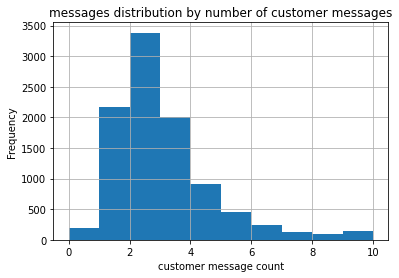

In [5]:
chatDataFrameCleaned.hist(column="Number of Customer Messages",bins=10)

# Set the title and axis labels
plt.title("messages distribution by number of customer messages")
plt.xlabel("customer message count")
plt.ylabel("Frequency")


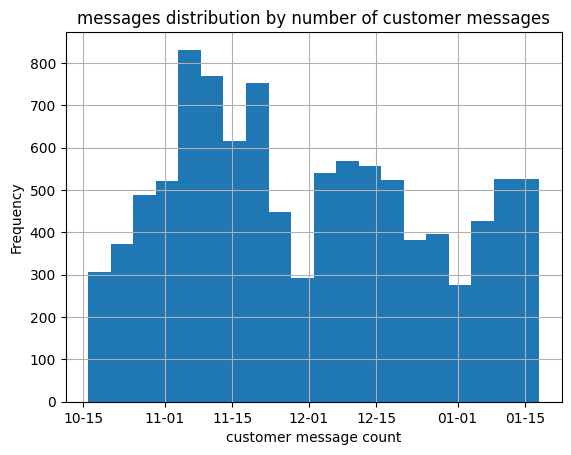

In [33]:
import matplotlib.dates as mdates

chatDataFrame["timestamp of first message"] =pd.to_datetime(chatDataFrame["timestamp of first message"]) 
#chatDataFrameCleaned.hist(column="timestamp of first message",bins=1)
chatDataFrame["timestamp of first message"].hist(bins=20)

# Set the title and axis labels
plt.title("Chat Volume")
plt.xlabel("date")
plt.ylabel("Frequency")
ax = plt.gca() # Get the current axes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.show()
